* https://twitter.com/eggplantmed/status/1629147688053923840
  * https://www.pref.chiba.lg.jp/kyouiku/anzen/hokenn/covid-19.html
    * https://www.pref.chiba.lg.jp/kyouiku/anzen/hokenn/documents/mokushoku-minaoshi.pdf

In [1]:
using Distributions
using Random
using StatsBase: ecdf
using StatsPlots
default(fmt=:png)

In [2]:
safediv(x, y) = x==0 ? zero(x/y) : x/y

function stat_chisq(a, b, c, d)
    safediv((a+b+c+d)*(a*d - b*c)^2, (a+b)*(c+d)*(a+c)*(b+d))
end

function pvalue_chisq(a, b, c, d)
    χ² = stat_chisq(a, b, c, d)
    ccdf(Chisq(1), χ²)
end

pvalue_chisq (generic function with 1 method)

In [3]:
function sim_chisq(p, q, r, N; L=10^5)
    mult = Multinomial(N, [p*r, (1-p)*r, q*(1-r), (1-q)*(1-r)])
    pval = Vector{Float64}(undef, L)
    tmpA = [Vector{Int}(undef, 4) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        A = rand!(mult, tmpA[Threads.threadid()])
        pval[i] = pvalue_chisq(A...)
    end
    _ecdf_pval = ecdf(pval)
    ecdf_pval(x) = _ecdf_pval(x)
    ecdf_pval
end

sim_chisq (generic function with 1 method)

In [4]:
function plot_sim(p, q, r, N; L=10^5)
    ecdf_pval = sim_chisq(p, q, r, N; L)
    plot(ecdf_pval, 0, 1; label="power")
    plot!(identity; label="", ls=:dot)
    plot!(xtick=0:0.05:1, ytick=0:0.05:1, xrotation=90)
    plot!(size=(400, 400))
end

plot_sim (generic function with 1 method)

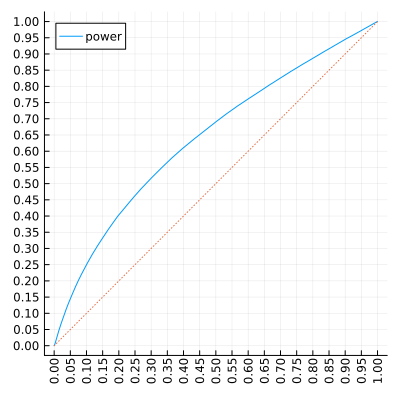

In [5]:
plot_sim(5/551, 27/1923, 551/1923, 551+1923)

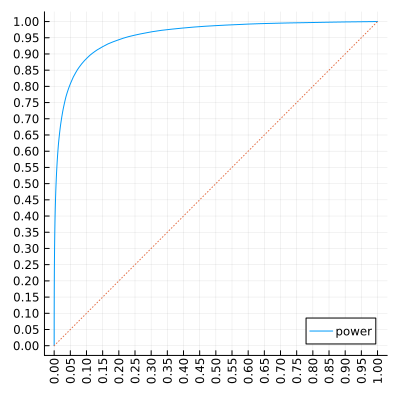

In [6]:
plot_sim(5/551, 27/1923, 551/1923, round(Int, 7.5*(551+1923)))